# Statistical Models for Time Series

## Data

In [1]:
data <- read.csv("data/DailyClimate/DailyDelhiClimateTrain.csv")
test <- read.csv("data/DailyClimate/DailyDelhiClimateTest.csv")

In [2]:
object.size(data)

153304 bytes

In [3]:
print(ncol(data))
print(nrow(data))

[1] 5
[1] 1462


In [4]:
head(data, n=3)

,date,meantemp,humidity,wind_speed,meanpressure
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-01,10.000000,84.5,0.000000,1015.667
2,2013-01-02,7.400000,92.0,2.980000,1017.800
3,2013-01-03,7.166667,87.0,4.633333,1018.667


In [5]:
head(test, n=3)

,date,meantemp,humidity,wind_speed,meanpressure
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-01-01,15.91304,85.86957,2.743478,59.000
2,2017-01-02,18.50000,77.22222,2.894444,1018.278
3,2017-01-03,17.11111,81.88889,4.016667,1018.333


In [6]:
data$date <- as.Date(data$date, "%Y-%m-%d")
test$date <- as.Date(test$date, "%Y-%m-%d")

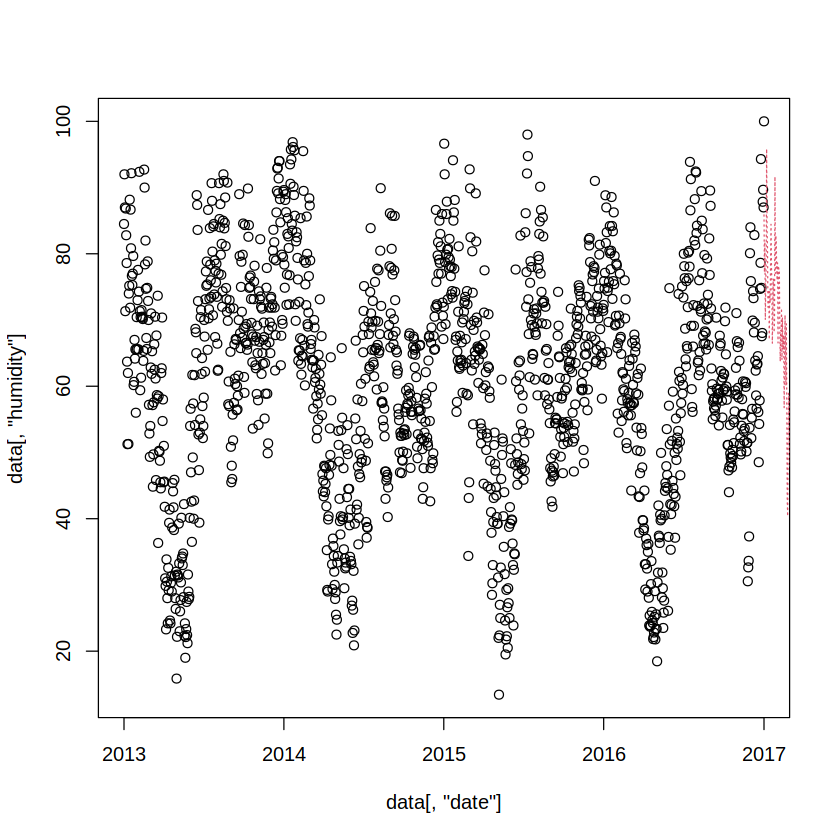

In [7]:
plot(data[,"date"],data[,"humidity"], col=1)
lines(test[,"date"],test[,"humidity"], col=2, lty="dotted")

## Autoregressive Models

### AR model

Autoregressive model is a model that says that future values of a time series are a function of its past values.
$$y_{t}=\phi_0+\phi_1\times y_{t-1}+\dots+ \phi_p\times y_{t-p}+e_{t}$$

The **error term** is assumed to have a constant varnce and mean of 0 and independent at different t values. If we assume the process is **stationary** (expected value and variance of the process must be the same all times) give us conditions about their coefficients $\phi$ (weak stationary).

* *week stationary*: require only that the mean and variance of a process be time invariante.
* *strong stationary*: requires that the distribution of the random variables ouput by a process remain the same over time (Cauchy distribution).

### Choosing parameters for an AR(p) model

To assess the appropriateness of an AR model for your data, begin by plotting the process and its **partial autocorrelation function**. The PACF of an AR model should cut off to zero beyond the order $p$ of an AR(p) process.

* *Autocorrelation function (AC)*: Is the correlation of a signal with a delated copy of itself as a function of the delay.
* *Partial autocorrelation function (PACF)*: These measure the relationship between $y_t$ and $y_{t-k}$ after removing the effects of lags $1,2,3,...,k-1$

Also plot **ACF of the residual** to see if there is a pattern of self-correlation that our model does not cover. Other test is using **Ljung-Box test** on the residuals:
* H0: The data does not exhibit serial correaltion.
* H1: The data does exhibit serial correlation.

### Forecasting

We can difference both the series and the predicted values to see whether the change from one time to th next is well predicted by the model. In case of forecasting many steps in the future, the variance of the prediction decreases with increasing forward horizon.

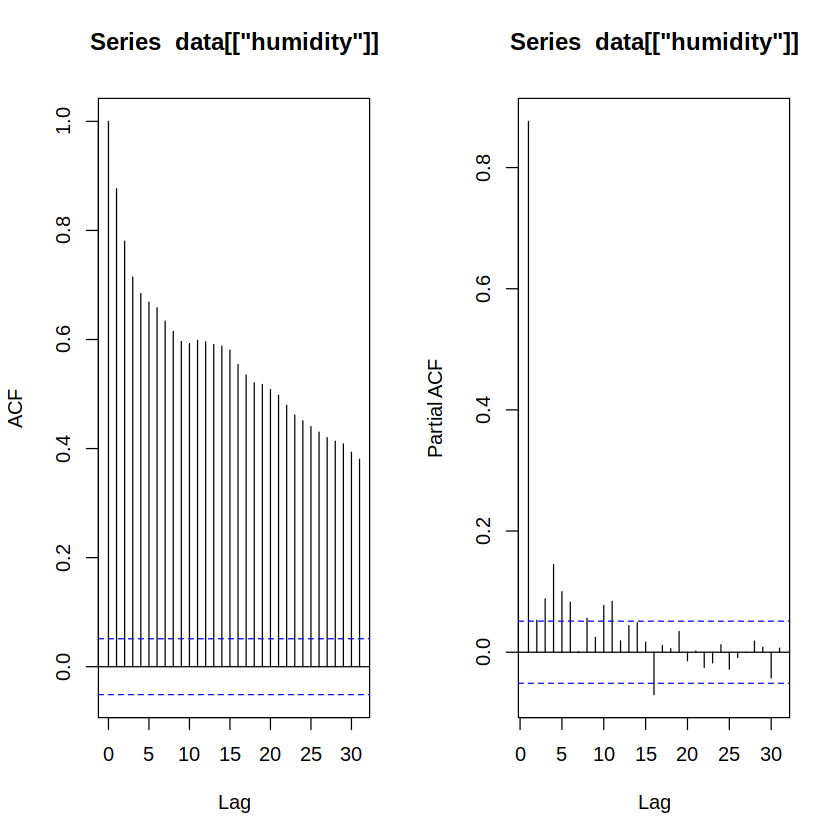

In [9]:
par(mfrow = c(1, 2))
acf(data[["humidity"]])
pacf(data[["humidity"]])

In [10]:
est <- ar(data[["humidity"]], method="mle")

In [11]:
est


Call:
ar(x = data[["humidity"]], method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.7834  -0.0267  -0.0280   0.0585   0.0238   0.0772  -0.0484   0.0514  
      9       10       11  
-0.0434   0.0163   0.0806  

Order selected 11  sigma^2 estimated as  59.98

In [33]:
est.1 <- arima(x=data[["humidity"]], 
               order=c(9,0,0))

In [34]:
Box.test(est.1$residuals, lag=10, type="Ljung", fitdf=3) #Box-Pierce


	Box-Ljung test

data:  est.1$residuals
X-squared = 14.801, df = 7, p-value = 0.03864


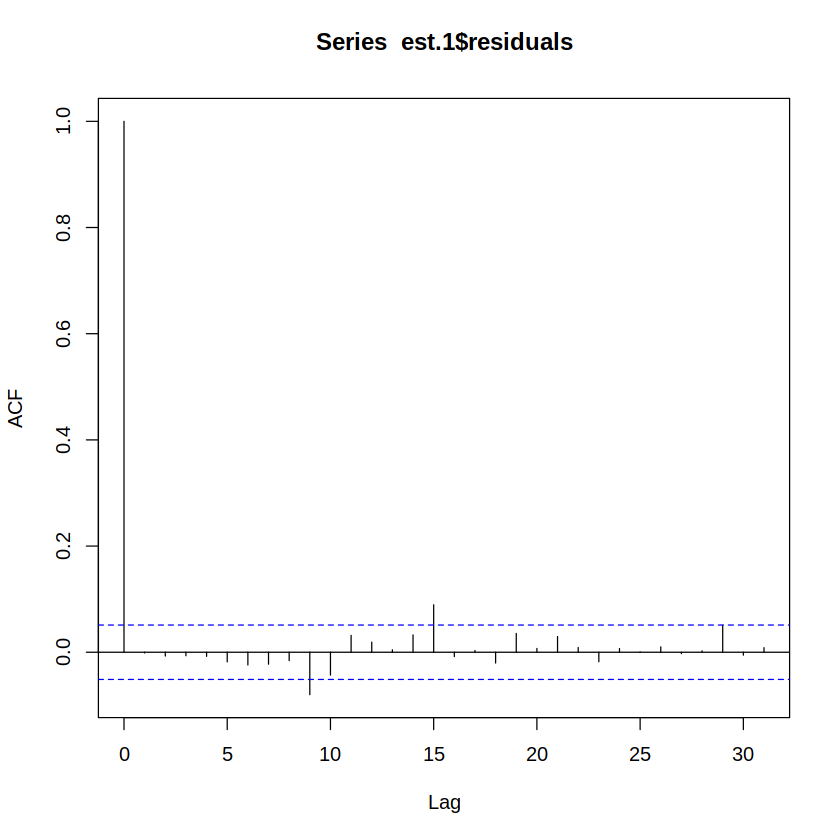

In [35]:
acf(est.1$residuals)

In [42]:
require(forecast)

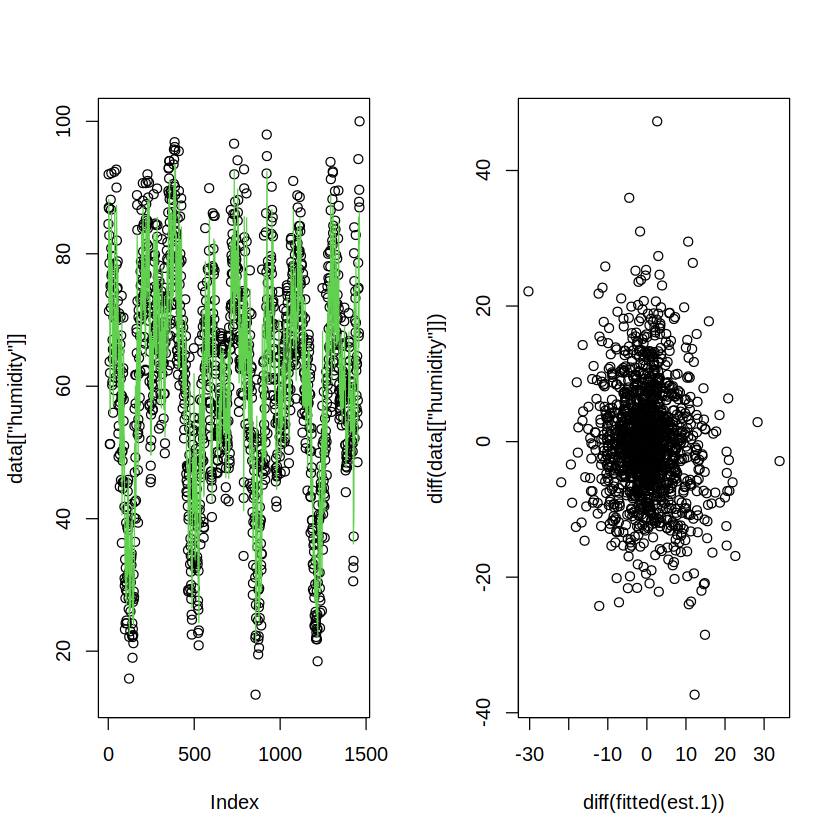

In [54]:
par(mfrow=c(1,2))
plot(data[["humidity"]])
lines(fitted(est.1), col=3, lwd=1)
plot(diff(fitted(est.1)), diff(data[["humidity"]]))

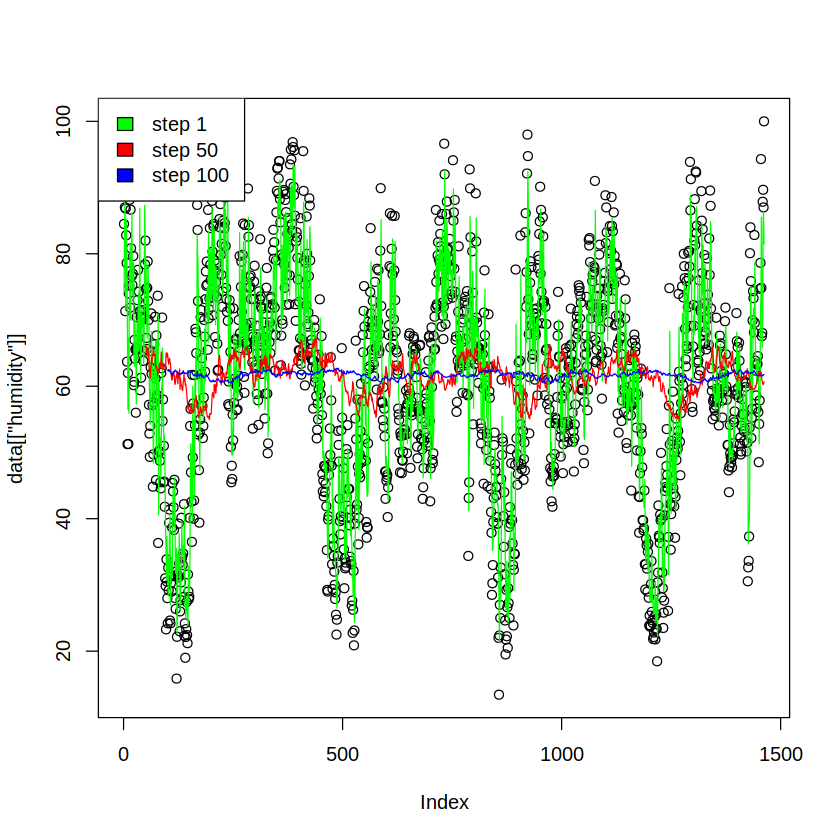

In [82]:
plot(data[["humidity"]])
lines(fitted(est.1, h=1), col="green", lwd=1)
lines(fitted(est.1, h=50), col="red", lwd=1)
lines(fitted(est.1, h=100), col="blue", lwd=1)
legend(x = "topleft", 
       box.col = "black", 
       legend=c("step 1", "step 50", "step 100"),
       fill=c("green", "red", "blue") 
      )

In [ ]:
https://otexts.com/fpp2/forecasting-on-training-and-test-sets.html

## Moving Average Models

### MA model

A MA model relies on a picture of a process in which the value at each point in time is funtion of the recent ast value "error" terms, 
each of which is indpendent from the others.
$$y_t = \mu + e_t + \theta_1 \times e_{t-1} + \theta_2 \times e_{t-2} + ... + \theta_q \times e_{t-q}$$
MA models are by definition weakly stationary without the need to imposed any constraints on their parameters.

### Selecting parameters for an MA(q) process

We fit an MA model to the same data used fit to AR model, and we can use the **autocorrelation function** to determine the order of the MA process.

We should also check our fit, as we did for the AR model, by plotting the **ACF of the residuals** of the model and, as a second, separate test of model performace, running the **Ljung-Box** test to check for overall randomness in any fit to the residuals.

### Forecasting

MA models exhibit strnong **mean reversion** and so forecasts rapidly converge to the mean of the process. If you  forecast beyond the range  of the model established by its order, the forecast will necessarrily be the mean of the process by definition of the process.

In [17]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.7 MB/s eta 0:00:003.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 3.1 MB/s eta 0:00:003.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.4 MB/s eta 0:00:003.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.5 MB/s eta 0:00:00m eta 0:00:01


In [9]:
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from datetime import datetime

In [5]:
stocks = pd.read_csv("data/Stocks/Index2018.csv")

In [8]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [12]:
stocks['date'] = stocks['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [21]:
stocks["return"] = stocks.ftse.pct_change(1)*100

In [33]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
 5   return  6268 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 294.0 KB


In [27]:
sgt.plot_acf( stocks.return[1:], zero=False, lags=40 )

SyntaxError: invalid syntax (127058870.py, line 1)

In [26]:
sgt.plot_acf(stocks.return[1:], zero=False, lags=40)

SyntaxError: invalid syntax (1770305674.py, line 1)

In [ ]:
ma.est <- arima(x=stocks[["meanpresure"]],
               order = c(0,0,2))

## ARIMA models

## Verctor autoregression

## Variations of Statistical Models